# Initiation

In [1]:
import sys
sys.path.append('../')
from smpy import *

file_path = "../pma files/hel1.pma" 

# Displaying Average Frame

Text(0.5, 1.0, 'Average Frame Image')

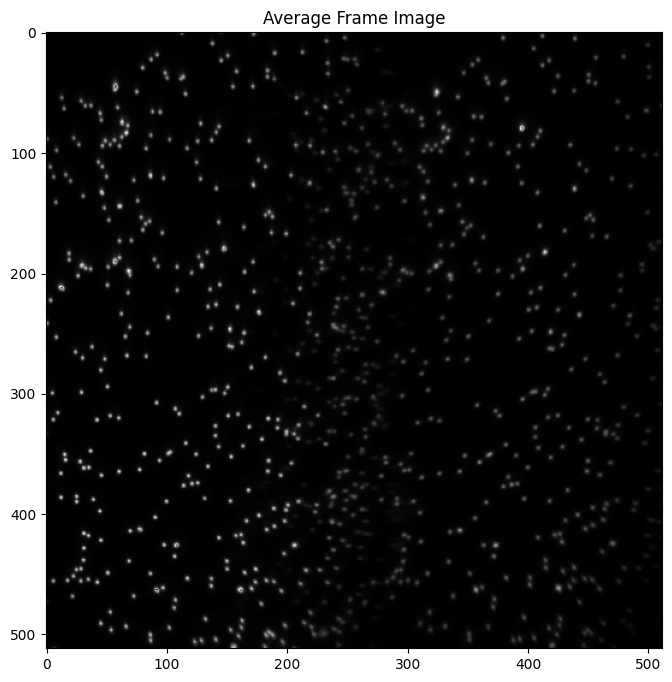

In [3]:
image_path = "../User Guide - Two Colour/hel1_Avg/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title("Average Frame Image")

# Detecting All Bright Spots

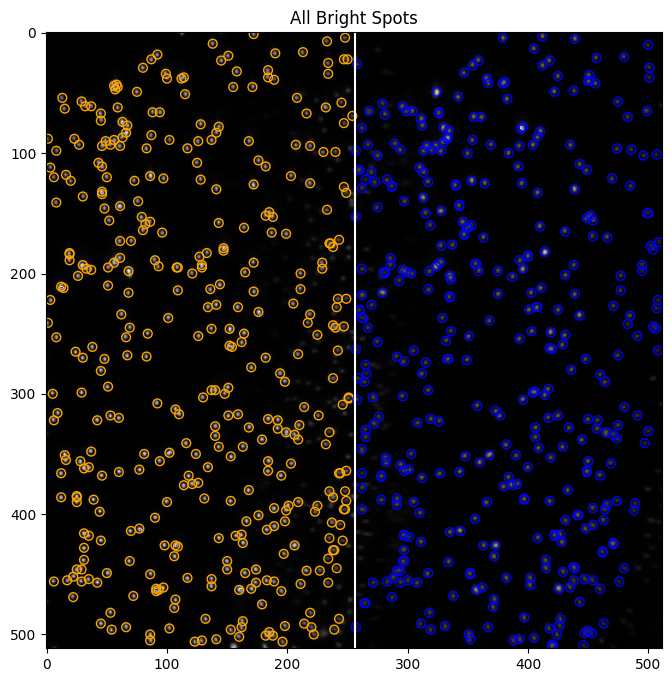

In [14]:
CH1_img_path = "../User Guide - Two Colour/hel1_Avg/hel1_CH1_Avg_Frame.png"
CH2_img_path = "../User Guide - Two Colour/hel1_Avg/hel1_CH2_Avg_Frame.png"
image_CH1 = io.imread(CH1_img_path, as_gray=True)  
image_CH2 = io.imread(CH2_img_path, as_gray=True)


bright_1,_ = find_peaks(CH1_img_path, min_distance = 1, clip=10, block_size = 32, scaler_percent = 20)
bright_2,_ = find_peaks(CH2_img_path, min_distance = 1, clip=10, block_size = 32, scaler_percent = 20)
bright_2_CH2 = shift_peaks(bright_2)

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.scatter(bright_1[:, 1], bright_1[:, 0], s=40, facecolor='none', edgecolor='orange')
plt.title("All Bright Spots")
plt.axvline(x= 256, color='w', linestyle='-')
plt.scatter(bright_2_CH2[:, 1], bright_2_CH2[:, 0], s=40, facecolor='none', edgecolor='b')
plt.show()

# Filtering Bright Spots

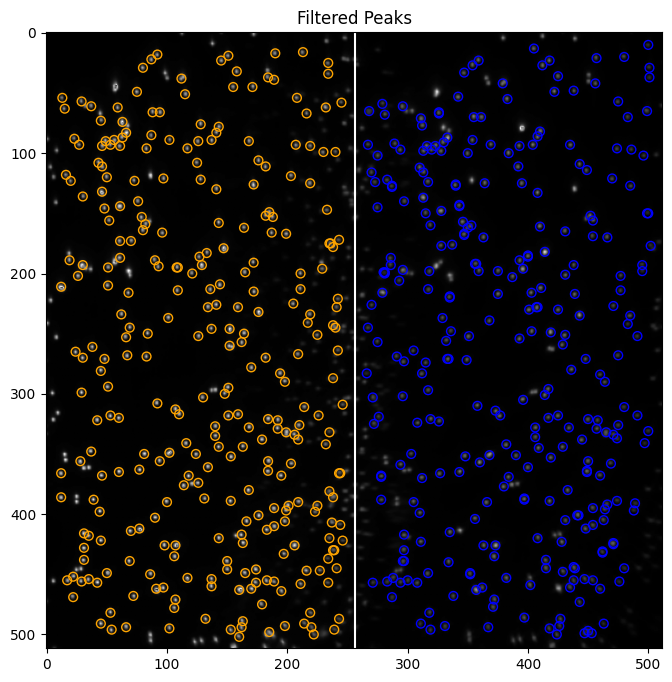

In [18]:
good_peaks_1, _ = find_good_peaks(CH1_img_path)
good_peaks_2_CH1, _ = find_good_peaks(CH2_img_path)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_CH1, [0, 256])


plt.figure(figsize=(8, 8))
plt.title("Filtered Peaks")
plt.axvline(x= 256, color='w', linestyle='-')
plt.imshow(image, cmap='gray')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=40, facecolor='none', edgecolor='orange')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=40, facecolor='none', edgecolor='b')
plt.show()
